In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image

In [12]:
# 定义旋转rotate函数
def rotate(image, angle, center=None, scale=1.0):
    # 获取图像尺寸
    (h, w) = image.shape[:2]
 
    # 若未指定旋转中心，则将图像中心设为旋转中心
    if center is None:
        center = (w / 2, h / 2)
 
    # 执行旋转
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
 
    # 返回旋转后的图像
    return rotated

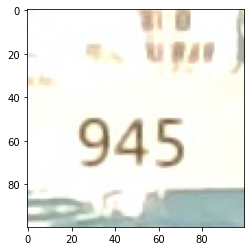

In [13]:
#讀取照片
rawimg0 = cv2.imread("test.jpg",1) #原始照片
#轉至180度
rawimg0=rotate(rawimg0, 180)

# 對照片進行定位後裁切
cropped = rawimg0[450:550,900:1000] 

# 查看裁切後的照片
plt.imshow(cropped)

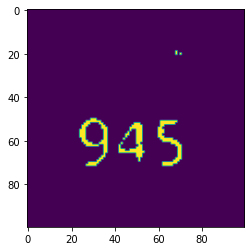

In [19]:
# 圖片灰階
grayscaleimg = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
#plt.imshow(grayscaleimg,cmap='gray')

# 圖片二值化
ret, binary = cv2.threshold(grayscaleimg,150, 255, cv2.THRESH_BINARY_INV) # 110這個數字可改
#plt.imshow(binary,cmap='Greys',interpolation='None')
rawimg = binary - binary[0,1] #有這欄 圖的最低就會變成0 圖會變成黑底白字
plt.imshow(binary)

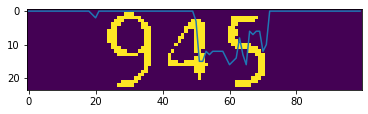

In [20]:
# counting non-zero value by row , axis y
row_nz = []
for row in rawimg.tolist():
    row_nz.append(len(row) - row.count(0))
plt.plot(row_nz)


idx=np.array(row_nz)>(max(row_nz)/4) #截出上下的範圍
np.where(idx==1)[0][0],np.where(idx==1)[0][-1]
up_y=np.where(idx==1)[0][-1]+2 #上界
down_y=np.where(idx==1)[0][0]-2 #下界
rawimg1=rawimg[down_y:up_y,]
plt.imshow(rawimg1)

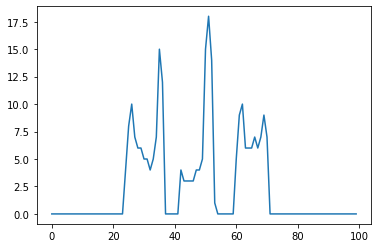

In [22]:
# counting non-zero value by column, x axis
col_nz = []
for col in rawimg1.T.tolist():
    col_nz.append(len(col) - col.count(0))
plt.plot(col_nz)

idy=np.not_equal(col_nz,0)
record_y=[] #如果有八個數字，裡面應該要有九個格子(一開始找出七個，前後插入變九個)
record_x=[]
for i in range(0,(len(np.where(idy==1)[0])-1)):
    
    # 如果下一個數是0就略過，直到找到下一個數不是0的位置
    con=np.where(idy==1)[0][i+1]-np.where(idy==1)[0][i]
    if(con==1):
        pass
    else:
        record_x.append(np.where(idy==1)[0][i+1]-2)
        record_y.append(np.where(idy==1)[0][i]+2)

# 插入第一個非0位置跟最後一個非0的位置
record_x.insert(0,np.where(idy==1)[0][0])
record_y.append(np.where(idy==1)[0][-1])

In [23]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model("keras_model.h5")

預測結果為: 945


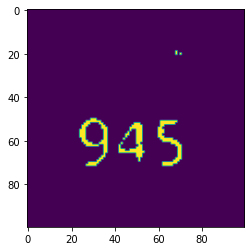

In [32]:
mypic=1
ans=""
for i in range(0,len(record_y)):
    a=binary[down_y:up_y,record_x[i]:record_y[i]]
    a=cv2.resize(a, (28, 28), interpolation=cv2.INTER_CUBIC)
    
    img_name='%s-%s.png'%(mypic,i+1)
    #cv2.imwrite(img_name,a)
    
    image = np.zeros((28,28,3))
    #print(image.shape)
    image[:,:,0]=a
    image[:,:,1]=a
    image[:,:,2]=a
    
    x=np.array(image).astype('float32')/255.
    #print(x.shape)
    pre=model.predict(x.reshape(1,28,28,3))
    y_label = np.argmax(pre)
    #print(y_label)
    ans+=str(y_label)
    #plt.imshow(a)
    
plt.imshow(binary)
print("預測結果為:",ans)